<a href="https://colab.research.google.com/github/Alyssasorensen/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square Test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/datasci_5_statistics/main/datasets/1c59b26a-1684-4bfb-92f7-205b947530cf.csv')

In [ ]:
df

,_id,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,6669690,2022-06-21T11:16:00,Accident,46,F,W,MO,Cocaine,Heroin,Fentanyl,Para-Fluorofentanyl,Amphetamines,Phentermine,Codeine,Fluoxetine,NaN,NaN,15084,NaN,2022
1,6669691,2021-03-30T16:15:00,Accident,54,M,W,MO,Methadone,Buprenorphine,Citalopram,Estilopram,Clonazepam,Oxycodone,Hydrocodone,Tramadol,NaN,NaN,15215,NaN,2021
2,6669692,2022-05-13T12:50:00,Accident,42,M,W,MO,Cocaine,Para-Fluorofentanyl,Methylphenidate,Fentanyl,Buprenorphine,Heroin,Citalopram/Escitalopram,Tramadol,NaN,NaN,15136,NaN,2022
3,6669693,2014-10-27T07:30:00,Accident,45,M,W,MO,Codeine,Hydrocodone,Morphine,Tramadol,NaN,NaN,NaN,NaN,NaN,NaN,15145,NaN,2014
4,6669694,2023-03-16T16:34:00,Accident,53,M,B,MO,Cocaine,Fentanyl,Acetyl Fentanyl,Para-Fluorofentanyl,Buprenorphine,Acetaminophen,Alcohol,NaN,NaN,NaN,15136,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,6674909,2022-07-24T20:10:00,Accident,51,F,W,MO,Cocaine,Methadone,Quetiapine,Fentanyl,Diphenhydramine,NaN,NaN,NaN,NaN,NaN,15212,NaN,2022
5220,6674910,2022-01-21T16:38:00,Accident,38,M,B,MO,Fentanyl,Para-Fluorofentanyl,Heroin,Tramadol,Diphenhydramine,NaN,NaN,NaN,NaN,NaN,15214,NaN,2022
5221,6674911,2021-07-01T14:53:00,Accident,42,M,W,MO,Fentanyl,Acetyl Fentanyl,Cocaine,Alprazolam,Diphenhydramine,NaN,NaN,NaN,NaN,NaN,15014,NaN,2021
5222,6674912,2022-06-20T15:14:00,Accident,33,F,W,MO,Fentanyl,Cocaine,Venlafaxine,Tramadol,Diphenhydramine,NaN,NaN,NaN,NaN,NaN,15145,NaN,2022


In [ ]:
df['sex'].value_counts()
df['combined_od1'].value_counts()

contingency_table = pd.crosstab(df['combined_od1'], df['sex'])
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

sex                          F   M
combined_od1                      
1,1-Difluoroethane           1   5
2-Fluoro Deschloroketamine   1   0
3-Methylfentanyl             2   0
4-Methoxy-Butyryl Fentanyl   0   1
Acetaminophen               13  20
...                         ..  ..
Tianeptine                   0   1
Topiramate                   1   0
Tramadol                     2   2
Trazodone                    1   0
Venlafaxine                  0   1

[93 rows x 2 columns]
Chi2 value: 196.14229747396303
P-value: 1.6218341076270582e-09


# T-Test

In [ ]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/datasci_5_statistics/main/datasets/COVID-19_Cases_and_Deaths_by_Age_Group_-_ARCHIVE.csv')
len(df)

5337

In [ ]:
## keep only complete rows
df = df.dropna()
len(df)

4613

In [ ]:
# Separate the data for the two age groups
age_group_0_9 = df[df['AgeGroups'] == '0-9']
df

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Probable cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,5/27/2021,0-9,21266.0,19931.0,1335.0,5649.0,1.0,1.0,0.0
1,5/27/2021,19-Oct,41363.0,37591.0,3772.0,9128.0,3.0,3.0,0.0
2,5/27/2021,20-29,60808.0,54548.0,6260.0,13066.0,10.0,10.0,0.0
3,5/27/2021,30-39,53926.0,48970.0,4956.0,12189.0,41.0,39.0,2.0
4,5/27/2021,40-49,48453.0,44467.0,3986.0,11196.0,150.0,119.0,31.0
...,...,...,...,...,...,...,...,...,...
5113,4/21/2021,19-Oct,38679.0,35382.0,3297.0,8536.0,4.0,4.0,0.0
5114,4/21/2021,20-29,58145.0,52459.0,5686.0,12494.0,10.0,10.0,0.0
5115,4/21/2021,30-39,51699.0,47171.0,4528.0,11685.0,39.0,37.0,2.0
5116,4/21/2021,40-49,46769.0,43079.0,3690.0,10807.0,134.0,110.0,24.0


In [ ]:
age_group_80_and_older = df[df['AgeGroups'] == '80 and older']
df

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Probable cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,5/27/2021,0-9,21266.0,19931.0,1335.0,5649.0,1.0,1.0,0.0
1,5/27/2021,19-Oct,41363.0,37591.0,3772.0,9128.0,3.0,3.0,0.0
2,5/27/2021,20-29,60808.0,54548.0,6260.0,13066.0,10.0,10.0,0.0
3,5/27/2021,30-39,53926.0,48970.0,4956.0,12189.0,41.0,39.0,2.0
4,5/27/2021,40-49,48453.0,44467.0,3986.0,11196.0,150.0,119.0,31.0
...,...,...,...,...,...,...,...,...,...
5113,4/21/2021,19-Oct,38679.0,35382.0,3297.0,8536.0,4.0,4.0,0.0
5114,4/21/2021,20-29,58145.0,52459.0,5686.0,12494.0,10.0,10.0,0.0
5115,4/21/2021,30-39,51699.0,47171.0,4528.0,11685.0,39.0,37.0,2.0
5116,4/21/2021,40-49,46769.0,43079.0,3690.0,10807.0,134.0,110.0,24.0


In [ ]:
# Extract the 'Total deaths' columns for both age groups
deaths_0_9 = age_group_0_9['Total deaths']
deaths_0_9

0       1.0
9       1.0
18      1.0
27      1.0
36      1.0
       ... 
5066    1.0
5075    1.0
5084    1.0
5103    1.0
5112    1.0
Name: Total deaths, Length: 513, dtype: float64

In [ ]:
deaths_80_and_older = age_group_80_and_older['Total deaths']
deaths_80_and_older

8       4642.0
17      4644.0
26      4645.0
35      4645.0
44      4645.0
         ...  
5074    2695.0
5083    2697.0
5092    2702.0
5102    4576.0
5111    4581.0
Name: Total deaths, Length: 512, dtype: float64

In [ ]:
# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(deaths_0_9, deaths_80_and_older)
t_statistic, p_value

(-85.9936077052475, 0.0)

In [ ]:
# Set the significance level (alpha)
alpha = 0.05

In [ ]:
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -85.9936077052475
P-value: 0.0


In [ ]:
# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in total deaths.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in total deaths.")

Reject the null hypothesis: There is a significant difference in total deaths.


# ANOVA

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
# Upload the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/datasci_5_statistics/main/datasets/COVID-19_Hospital_Capacity.csv')
df

,Hospital,Date,Bed Type,Status,Count
0,All SF Acute Hospitals,2020/07/22,Intensive Care Surge,Available,309
1,All SF Acute Hospitals,2020/04/01,Acute Care,Available,846
2,All SF Acute Hospitals,2020/07/22,Acute Care Surge,Available,406
3,All SF Acute Hospitals,2020/04/02,Intensive Care,COVID-19 (Confirmed & Suspected),43
4,All SF Acute Hospitals,2020/04/02,Intensive Care,Other Patients,107
...,...,...,...,...,...
4509,All SF Acute Hospitals,2021/07/17,Intensive Care,COVID-19 (Confirmed & Suspected),17
4510,All SF Acute Hospitals,2021/07/17,Intensive Care,Other Patients,151
4511,All SF Acute Hospitals,2021/07/17,Intensive Care Surge,Occupied Surge,0
4512,All SF Acute Hospitals,2021/07/17,Acute Care,COVID-19 (Confirmed & Suspected),26


In [5]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(
    df[df['Bed Type'] == 'Intensive Care']['Count'],
    df[df['Bed Type'] == 'Acute Care']['Count'],
    df[df['Bed Type'] == 'Acute Care Surge']['Count'],
)
f_statistic, p_value

(804.0028291382357, 2.2577527445560847e-290)

In [6]:
# Define significance level (alpha)
alpha = 0.05

In [ ]:
# Define significance level (alpha)
alpha = 0.05

In [7]:
# Check p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in patient counts among bed types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in patient counts among bed types.")

Reject the null hypothesis. There is a significant difference in patient counts among bed types.


In [8]:
# Print the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 804.0028291382357
P-value: 2.2577527445560847e-290


# Regression Analysis

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
# load in dataset
df = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/datasci_5_statistics/main/datasets/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2018-2020.csv')
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Y_lat', 'X_lon'],
      dtype='object')

In [14]:
## vars of interest: Data Value and Latitude
df = df[['Data_Value', 'Y_lat']]
df

,Data_Value,Y_lat
0,14.4,55.442393
1,10.6,53.648343
2,NaN,38.488805
3,38.3,39.471465
4,63.8,43.673071
...,...,...
2224,NaN,39.468168
2225,NaN,38.507962
2226,NaN,37.768577
2227,NaN,38.774126


In [15]:
# Remove any row with missing data
df = df.dropna()
df

,Data_Value,Y_lat
0,14.4,55.442393
1,10.6,53.648343
3,38.3,39.471465
4,63.8,43.673071
5,57.2,47.328037
...,...,...
2126,117.2,43.372311
2127,116.0,43.018871
2144,34.9,43.067666
2154,66.8,42.677476


In [17]:
# lets remove outliers, greater then 3 SDs from the mean
df = df[(df['Data_Value'] - df['Data_Value'].mean()) / df['Data_Value'].std() < 3]
df = df[(df['Y_lat'] - df['Y_lat'].mean()) / df['Y_lat'].std() < 3]
df

,Data_Value,Y_lat
3,38.3,39.471465
4,63.8,43.673071
5,57.2,47.328037
6,51.8,44.003484
7,62.2,46.407335
...,...,...
2126,117.2,43.372311
2127,116.0,43.018871
2144,34.9,43.067666
2154,66.8,42.677476


In [18]:
df.head(20)

,Data_Value,Y_lat
3,38.3,39.471465
4,63.8,43.673071
5,57.2,47.328037
6,51.8,44.003484
7,62.2,46.407335
8,67.8,48.066007
9,68.4,46.120661
10,80.3,44.023560
11,60.0,47.774467
12,58.7,45.586237


In [23]:
# save
df.to_csv('https://raw.githubusercontent.com/Alyssasorensen/datasci_5_statistics/main/datasets/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2018-2020.csv')

In [24]:
# Define the dependent and independent variables
X = df['Data_Value']
y = df['Y_lat']

In [25]:
# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

In [26]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [27]:
# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_lat   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     52.06
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.03e-12
Time:                        01:30:56   Log-Likelihood:                -2905.4
No. Observations:                1049   AIC:                             5815.
Df Residuals:                    1047   BIC:                             5825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4893      0.499     89.157      0.0

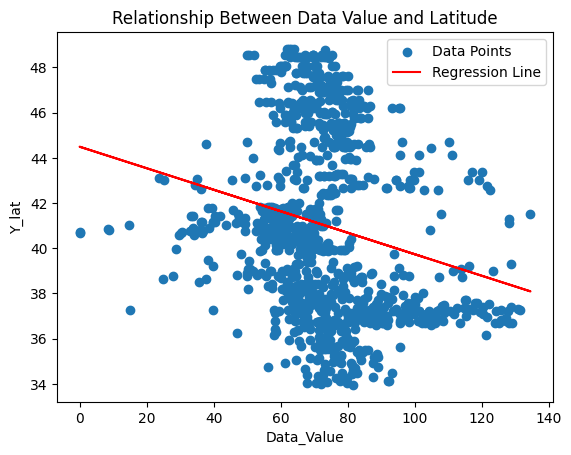

In [30]:
plt.scatter(df['Data_Value'], df['Y_lat'], label='Data Points')
plt.plot(df['Data_Value'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Data_Value')
plt.ylabel('Y_lat')
plt.title('Relationship Between Data Value and Latitude')
plt.legend()
plt.show()